# New Model Findings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import datetime
from dateutil.relativedelta import relativedelta
import time

from cartopy import crs as ccrs, feature as cfeature
import warnings
warnings.filterwarnings('ignore')

import xarray as xr
import glob, os
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'
import xskillscore as xs

from eofs.xarray import Eof
from eofs.standard import Eof as sEof # If needed
from eofs.multivariate.standard import MultivariateEof

from scipy import stats
import statsmodels.api as sm

sp = ccrs.SouthPolarStereo()
pc = ccrs.PlateCarree()
import matplotlib.patches as mpatches



In [67]:
matrix_type = 'cross'
region = 'dp1_region'
fname = 'sic_sat_z_u_v-2*1*1*1*1'
modes=8
model_name = f'{fname}-{modes}'

# Load in new correlation, new rmse, new correlation persistence, new rmse persistence
path = f'/d6/bxw2101/model_files/{matrix_type}_analysis/{region}'
new_c = np.loadtxt(f'{path}/{fname}/{fname}-{modes}-corr.txt')
new_r = np.loadtxt(f'{path}/{fname}/{fname}-{modes}-rmse.txt')
new_pc = np.loadtxt(f'{path}/persistence-corr.txt')
new_pr = np.loadtxt(f'{path}/persistence-rmse.txt')

# Load in old correlation, old rmse, old correlation persistence, old rmse persistence
path = f'/d6/bxw2101/o_model_files/{matrix_type}_analysis/{region}'
old_c = np.loadtxt(f'{path}/{fname}/{fname}-{modes}-corr.txt')
old_r = np.loadtxt(f'{path}/{fname}/{fname}-{modes}-rmse.txt')
old_pc = np.loadtxt(f'{path}/persistence-corr.txt')
old_pr = np.loadtxt(f'{path}/persistence-rmse.txt')

## same variables (without SST), new model vs old model corr +rmse. dp1

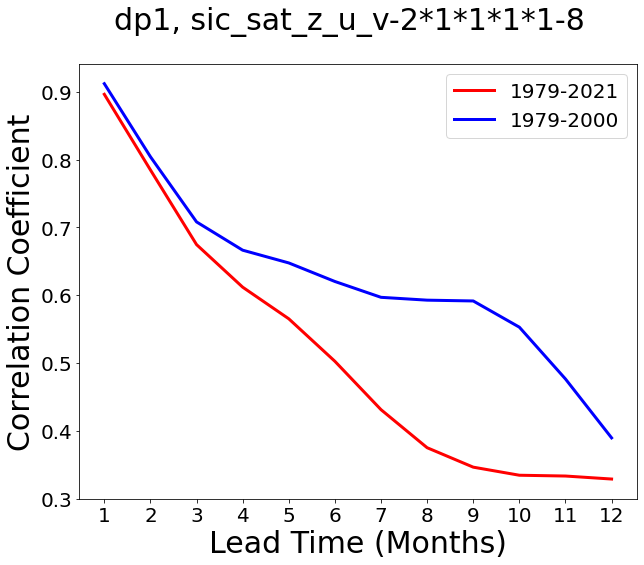

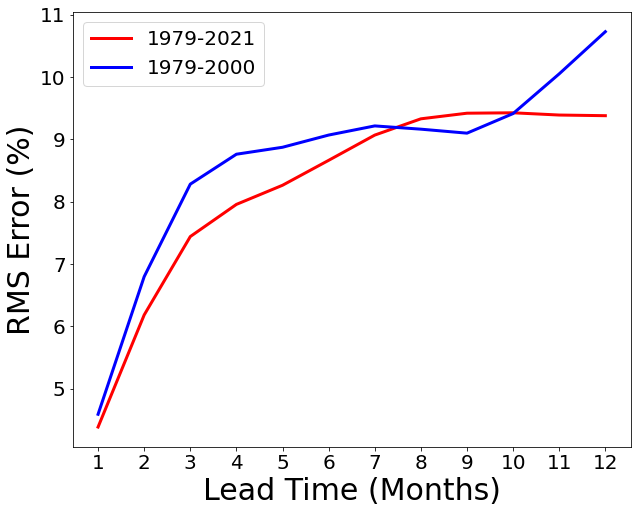

In [69]:
xticks = np.arange(1, 13)

#building out the correlation plot: first graph the persistence correlation, then the model correlations.
fig = plt.figure(figsize=(10,8))
plt.suptitle(f'dp1, {model_name}', fontsize=30)

plt.plot(xticks, new_c, linewidth=3, color='red')
plt.plot(xticks, old_c, linewidth=3, color='blue')

#format and name the correlation plot.
plt.yticks(fontsize=20)
plt.xticks(xticks, fontsize=20);
plt.ylabel('Correlation Coefficient', fontsize=30)
plt.xlabel('Lead Time (Months)', fontsize=30)
plt.legend(['1979-2021', '1979-2000'], prop={'size': 20})
plt.show()

#building out the rmse plot: first graph persistence rmse, then the model rmses.
fig = plt.figure(figsize=(10,8))
#plt.plot(xticks, persistence_r*100, linewidth = 3, color = 'k', linestyle='dashed')

plt.plot(xticks, new_r*100, linewidth = 3, color='red')
plt.plot(xticks, old_r*100, linewidth = 3, color='blue')


#format and name the rmse plot.
plt.yticks(fontsize=20)
plt.xticks(xticks, fontsize=20)
plt.ylabel('RMS Error (%)', fontsize=30)
plt.xlabel('Lead Time (Months)', fontsize=30)
plt.legend(['1979-2021', '1979-2000'], prop={'size': 20})
plt.show()

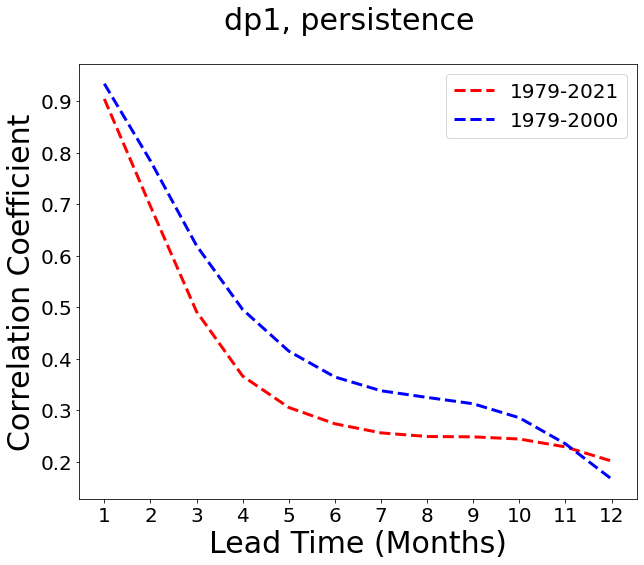

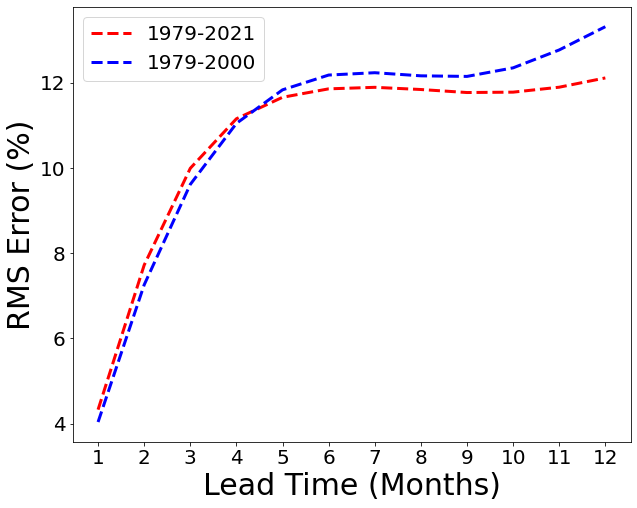

In [64]:
xticks = np.arange(1, 13)

#building out the correlation plot: first graph the persistence correlation, then the model correlations.
fig = plt.figure(figsize=(10,8))
plt.suptitle('dp1, persistence', fontsize=30)

plt.plot(xticks, new_pc, linewidth = 3, color = 'red', linestyle='dashed')
plt.plot(xticks, old_pc, linewidth = 3, color = 'blue', linestyle='dashed')

#format and name the correlation plot.
plt.yticks(fontsize=20)
plt.xticks(xticks, fontsize=20);
plt.ylabel('Correlation Coefficient', fontsize=30)
plt.xlabel('Lead Time (Months)', fontsize=30)
plt.legend(['1979-2021', '1979-2000'], prop={'size': 20})
plt.show()

#building out the rmse plot: first graph persistence rmse, then the model rmses.
fig = plt.figure(figsize=(10,8))

plt.plot(xticks, new_pr*100, linewidth = 3, color='red', linestyle='dashed')
plt.plot(xticks, old_pr*100, linewidth = 3, color = 'blue', linestyle='dashed')


#format and name the rmse plot.
plt.yticks(fontsize=20)
plt.xticks(xticks, fontsize=20)
plt.ylabel('RMS Error (%)', fontsize=30)
plt.xlabel('Lead Time (Months)', fontsize=30)
plt.legend(['1979-2021', '1979-2000'], prop={'size': 20})
plt.show()

Text(0.5, 42.00000000000006, 'Lead time (Months)')

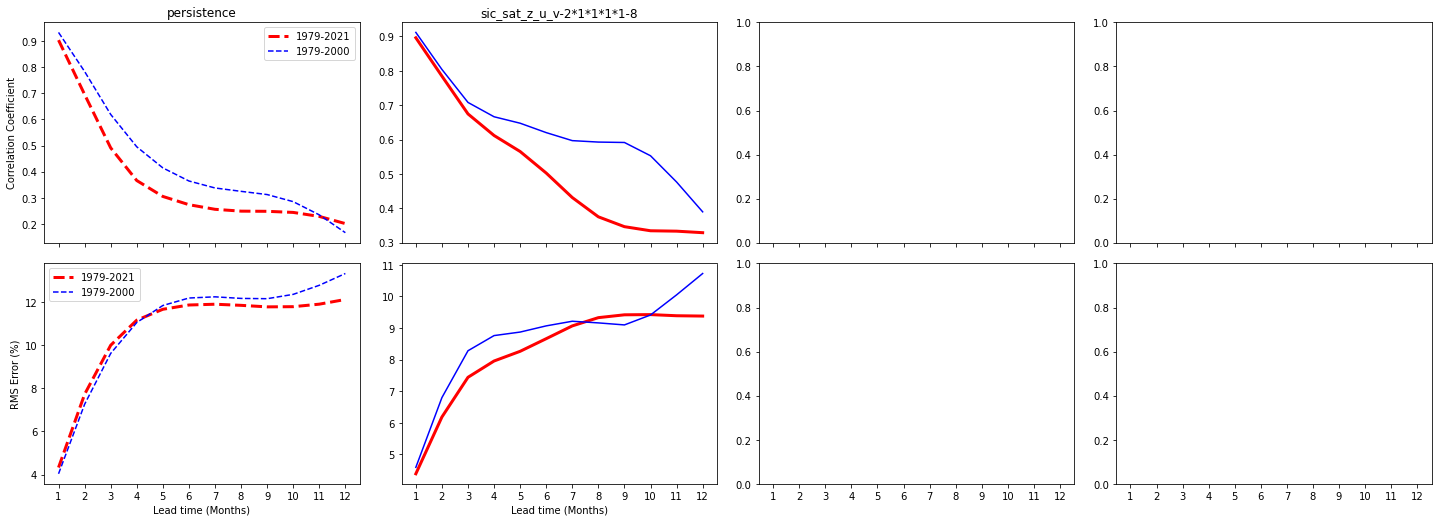

In [70]:
fig, axs = plt.subplots(2, 4, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(20)
plt.tight_layout()


axs[0, 0].set_xticks(xticks)
axs[0, 0].set_title('dp1 region')
axs[0, 0].set_ylabel('Correlation Coefficient')
axs[1, 0].set_ylabel('RMS Error (%)')


xticks = np.arange(1, 13)
axs[0, 0].set_xticks(xticks)
axs[0, 0].set_ylabel('Correlation Coefficient')
axs[1, 0].set_ylabel('RMS Error (%)')

# Persistence Column
axs[0, 0].set_title('persistence')
axs[0, 0].plot(xticks, new_pc, linewidth = 3, color = 'red', linestyle='dashed')
axs[0, 0].plot(xticks, old_pc, color = 'blue', linestyle='dashed')
axs[0, 0].legend(['1979-2021', '1979-2000'])

axs[1, 0].plot(xticks, new_pr*100, linewidth = 3, color='red', linestyle='dashed')
axs[1, 0].plot(xticks, old_pr*100, color = 'blue', linestyle='dashed')
axs[1, 0].legend(['1979-2021', '1979-2000'])
axs[1, 0].set_xlabel('Lead time (Months)')

# First Model Column
axs[0, 1].set_title(model_name)
axs[0, 1].plot(xticks, new_c, linewidth = 3, color='red')
axs[0, 1].plot(xticks, old_c, color='blue')

axs[1, 1].plot(xticks, new_r*100, linewidth = 3, color='red')
axs[1, 1].plot(xticks, old_r*100, color='blue')
axs[1, 1].set_xlabel('Lead time (Months)')

Text(0.5, 42.00000000000006, 'Lead time (Months)')

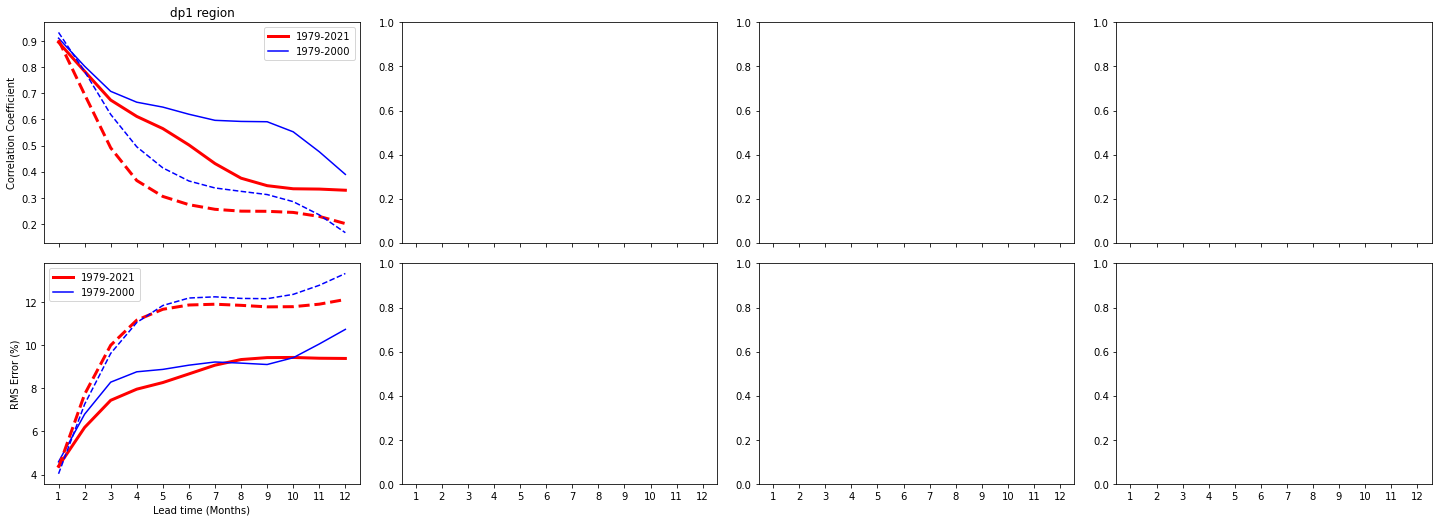

In [66]:
fig, axs = plt.subplots(2, 4, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(20)
plt.tight_layout()

xticks = np.arange(1, 13)
axs[0, 0].set_xticks(xticks)
axs[0, 0].set_title('dp1 region')
axs[0, 0].set_ylabel('Correlation Coefficient')
axs[1, 0].set_ylabel('RMS Error (%)')

# Plot correlation and the correlation persistence
axs[0, 0].plot(xticks, new_c, linewidth = 3, color='red')
axs[0, 0].plot(xticks, old_c, color='blue')
axs[0, 0].plot(xticks, new_pc, linewidth = 3, color = 'red', linestyle='dashed')
axs[0, 0].plot(xticks, old_pc, color = 'blue', linestyle='dashed')
axs[0, 0].legend(['1979-2021', '1979-2000'])

# Plot rmse and the rmse persistence
axs[1, 0].plot(xticks, new_r*100, linewidth = 3, color='red')
axs[1, 0].plot(xticks, old_r*100, color='blue')
axs[1, 0].plot(xticks, new_pr*100, linewidth = 3, color='red', linestyle='dashed')
axs[1, 0].plot(xticks, old_pr*100, color = 'blue', linestyle='dashed')
axs[1, 0].legend(['1979-2021', '1979-2000'])
axs[1, 0].set_xlabel('Lead time (Months)')

## eastern region

## persistence, old v new. dp1

In [ ]:
# 

In [ ]:
mfiles_n = ['sic_sst_sat_sthf-2*1*1*1-8']
mfiles_o = ['sic_sst_sat_sthf-2*1*1*1-8']

